Import the image into Jupyter Notebook.

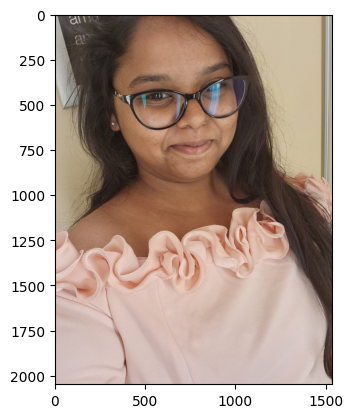

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img_1 = cv2.imread("/content/WhatsApp Image 2023-09-22 at 11.49.01 AM.jpeg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#Let's do the conversion in imshow
plt.imshow(img_1)

Analyze the image.  

In [15]:
print(img_1.size)
print(img_1.shape)
print(img_1.dtype)
print(img_1[0][0][0])
print(img_1)
# plt.imshow(img, cmap='gray')

9437184
(2048, 1536, 3)
uint8
188
[[[188 183 177]
  [188 183 177]
  [188 183 179]
  ...
  [189 181 158]
  [192 182 157]
  [193 183 158]]

 [[188 183 177]
  [188 183 177]
  [188 183 179]
  ...
  [188 180 157]
  [191 181 156]
  [192 182 157]]

 [[188 183 177]
  [188 183 177]
  [188 183 179]
  ...
  [188 180 157]
  [190 180 155]
  [192 182 157]]

 ...

 [[208 190 188]
  [208 190 188]
  [208 190 188]
  ...
  [168 154 141]
  [162 146 131]
  [163 147 131]]

 [[208 190 188]
  [208 190 188]
  [208 190 188]
  ...
  [169 155 142]
  [158 142 127]
  [160 144 129]]

 [[208 190 188]
  [208 190 188]
  [208 190 188]
  ...
  [170 156 143]
  [155 139 126]
  [157 141 126]]]


In [16]:
if isinstance(img_1, np.ndarray):
  print("my_array is a numpy array")
else:
  print("my_array is not a numpy array")

my_array is a numpy array


We have an image with 9437184 elements contained in a 3D array with
dimensions (2048, 1151, 3)
The data type of each element is uint8 which stands for unsigned 8-bit integer. Unsigned
denotes that it is non-negative number (zero or positive).

Create a histogram of the whole image

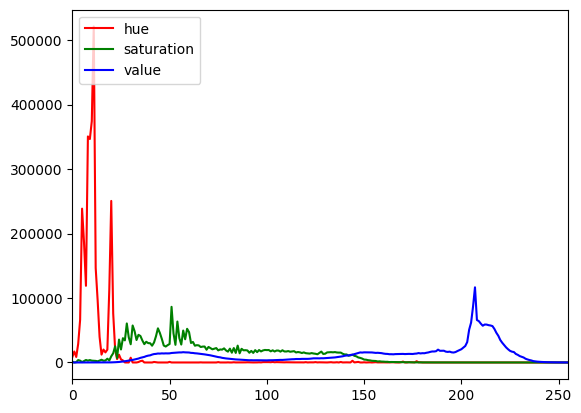

In [17]:
# Convert to HSV
img = cv2.cvtColor(img_1, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()


Modify your image with brightness and contrast so it fills the complete tonal range.


In [18]:
def adjust_brightness_contrast(image_array, alpha, beta):
# Convert to floating point to avoid overflow and underflow
  temp = image_array.astype('float32')
# Adjust contrast
  temp *= alpha
# Adjust brightness
  temp += beta
# Clip values to be in the range [0, 255]
  temp = np.clip(temp, 0, 255)
  return temp.astype('uint8')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [19]:
adjusted_img = adjust_brightness_contrast(img_1, 1.2, 0)
copy_img = adjusted_img.copy()

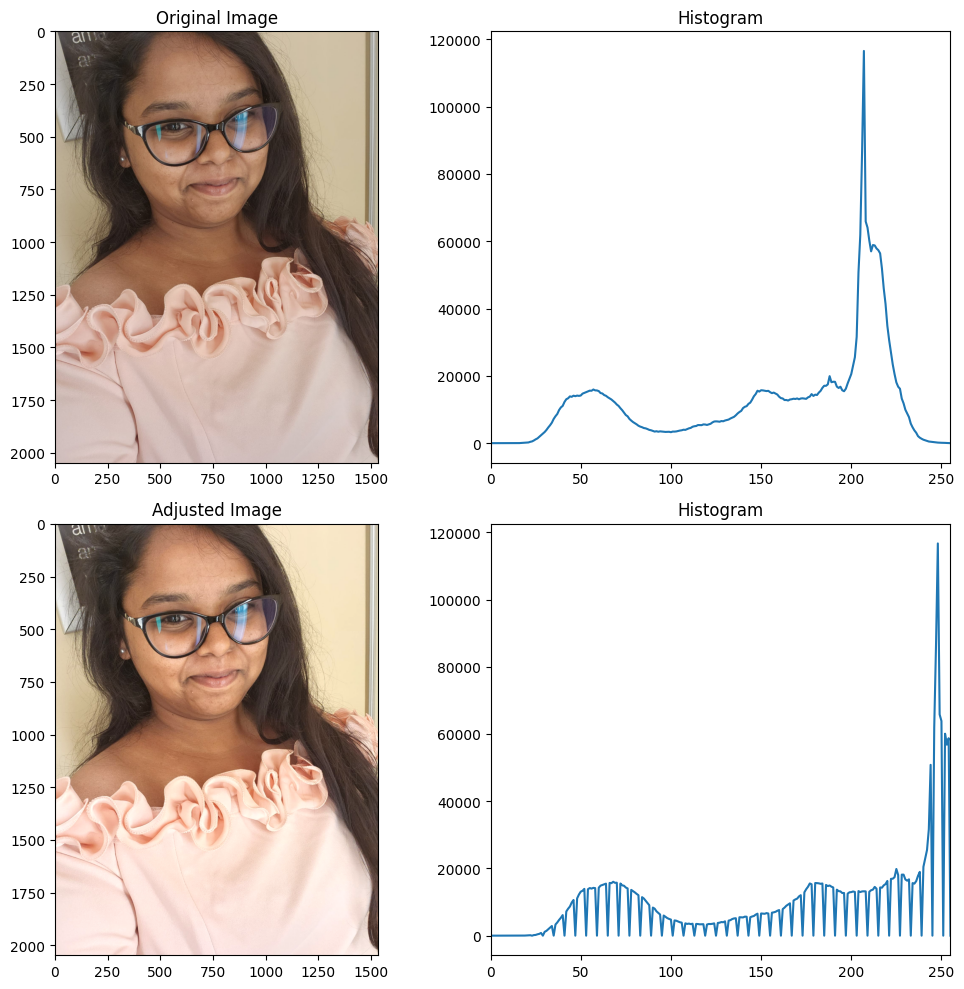

In [20]:
# Calculate histogram of adjusted image
adjusted_hist = cv2.calcHist([adjusted_img],[0],None,[256],[0,255])
# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(img_1, cmap="gray")
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.tight_layout()
plt.show()

Create a mask of your face.

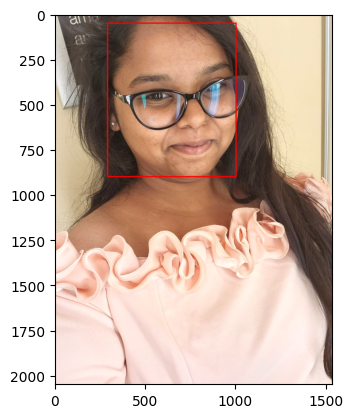

In [21]:
top_left = (290,50)
# Bottom right corner of rectangle
bottom_right = (1000,900)
# Color
rect_color = (255,0,0)
# Thickness
thickness = 5
# Rectangle function
img_rect = cv2.rectangle(adjusted_img, top_left, bottom_right, rect_color, thickness)
# Plot image
plt.imshow(img_rect)

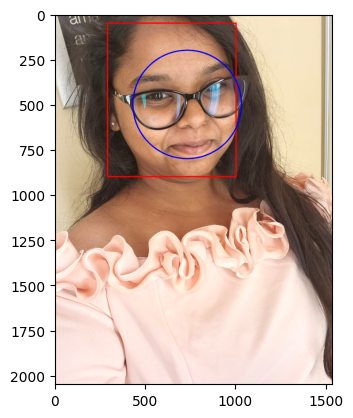

In [22]:
center_circle = (730,500)
# Radius of the circle
radius = 300
# Color
circle_color = (0, 0, 255)
# Add circle to image

img_circle = cv2.circle(adjusted_img, center_circle, radius, circle_color, thickness)
plt.imshow(img_circle)

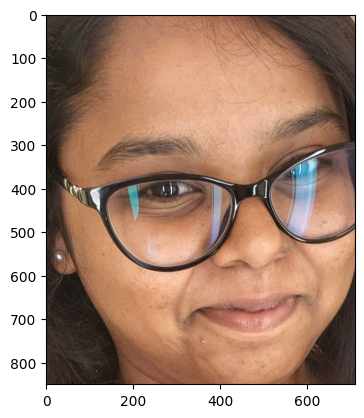

In [23]:
img_masked = copy_img[50:900, 290:1000]
plt.imshow(img_masked)

Use the mask to create a HSV histogram

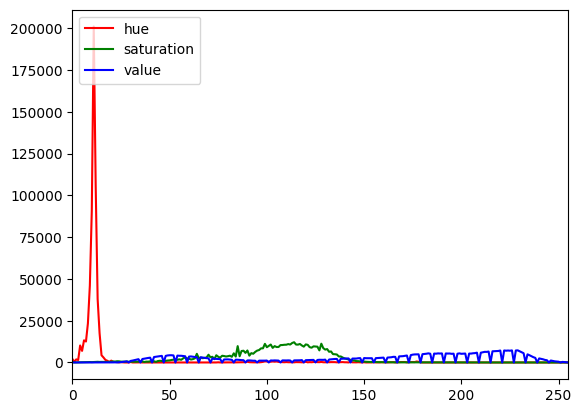

In [24]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

Analyze the histogram for skin tone ranges.

The ranges for hsv are [0,70,0] and [30,170,250], these are the min and max ranges.

Use the HSV ranges to create a mask of skin tones.

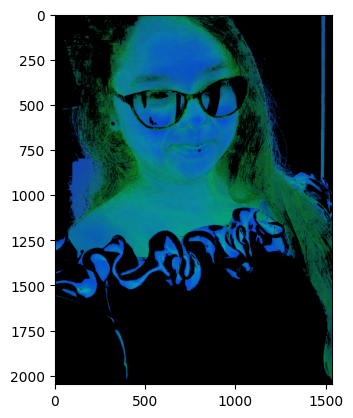

In [25]:
mask = cv2.inRange(img,np.uint8([0,70,0]),np.uint8([30,170,250]))
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

Apply the mask to the image and segment out your skin/face.

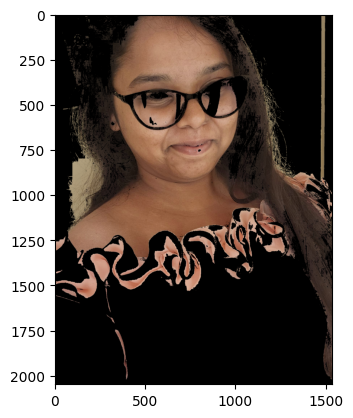

In [26]:
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)
plt.imshow(img_masked)

The algorithm has outlined the skin tone, as the dress color is similar to skin tone, it is highlighted.